# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [58]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats
%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
    
os.getenv("PUIDATA")



Populating the interactive namespace from numpy and matplotlib


'/home/cusp/cm4692/PUIdata'

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [4]:
datestring1 = '201506'
getCitiBikeCSV(datestring1)

('Downloading', '201506')
file in place, you can continue


In [5]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [6]:
datestring2 = '201501'
getCitiBikeCSV(datestring2)

('Downloading', '201501')
file in place, you can continue


In [7]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [40]:

df = pd.concat([df1, df2],ignore_index=True)

df.drop([ 'start station id',
       'start station name','gender',
        'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid'
       ], axis=1, inplace=True)
df.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year
0,1338,6/1/2015 0:00,6/1/2015 0:22,40.727103,-74.002971,Subscriber,1984.0
1,290,6/1/2015 0:00,6/1/2015 0:05,40.727791,-73.985649,Subscriber,1997.0
2,634,6/1/2015 0:01,6/1/2015 0:11,40.735238,-74.000271,Subscriber,1993.0
3,159,6/1/2015 0:01,6/1/2015 0:04,40.716059,-73.991908,Subscriber,1981.0
4,1233,6/1/2015 0:02,6/1/2015 0:22,40.734927,-73.992005,Customer,NaN


In [69]:
df.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,startime,durationD,durationN
0,1338,6/1/2015 0:00,6/1/2015 0:22,40.727103,-74.002971,Subscriber,1984.0,2015-06-01 00:00:00,NaN,1338.0
1,290,6/1/2015 0:00,6/1/2015 0:05,40.727791,-73.985649,Subscriber,1997.0,2015-06-01 00:00:00,NaN,290.0
2,634,6/1/2015 0:01,6/1/2015 0:11,40.735238,-74.000271,Subscriber,1993.0,2015-06-01 00:01:00,NaN,634.0
3,159,6/1/2015 0:01,6/1/2015 0:04,40.716059,-73.991908,Subscriber,1981.0,2015-06-01 00:01:00,NaN,159.0
4,1233,6/1/2015 0:02,6/1/2015 0:22,40.734927,-73.992005,Customer,NaN,2015-06-01 00:02:00,NaN,1233.0


In [42]:

df['startime'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,startime
0,1338,6/1/2015 0:00,6/1/2015 0:22,40.727103,-74.002971,Subscriber,1984.0,2015-06-01 00:00:00
1,290,6/1/2015 0:00,6/1/2015 0:05,40.727791,-73.985649,Subscriber,1997.0,2015-06-01 00:00:00
2,634,6/1/2015 0:01,6/1/2015 0:11,40.735238,-74.000271,Subscriber,1993.0,2015-06-01 00:01:00
3,159,6/1/2015 0:01,6/1/2015 0:04,40.716059,-73.991908,Subscriber,1981.0,2015-06-01 00:01:00
4,1233,6/1/2015 0:02,6/1/2015 0:22,40.734927,-73.992005,Customer,NaN,2015-06-01 00:02:00


## SPLIT BY CATEGORY
as an example I am splitting data by startime and looking at duration:

H0: there is no statistical difference in the duration distribution of rides in daytime and in nightime.

H1:there is significant statistical difference in the duration distribution of rides in daytime and in nightime.

α=0.05

In [48]:
df['durationD'] = df['tripduration'][ (df["startime"].dt.hour > 6) & (df["startime"].dt.hour <=18 )]
df['durationN'] = df['tripduration'][(df["startime"].dt.hour <= 6)|(df["startime"].dt.hour > 18)]

In [61]:
df['durationD'].dropna(inplace= True)
df['durationN'].dropna(inplace= True)
df

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,startime,durationD,durationN
0,1338,6/1/2015 0:00,6/1/2015 0:22,40.727103,-74.002971,Subscriber,1984.0,2015-06-01 00:00:00,NaN,1338.0
1,290,6/1/2015 0:00,6/1/2015 0:05,40.727791,-73.985649,Subscriber,1997.0,2015-06-01 00:00:00,NaN,290.0
2,634,6/1/2015 0:01,6/1/2015 0:11,40.735238,-74.000271,Subscriber,1993.0,2015-06-01 00:01:00,NaN,634.0
3,159,6/1/2015 0:01,6/1/2015 0:04,40.716059,-73.991908,Subscriber,1981.0,2015-06-01 00:01:00,NaN,159.0
4,1233,6/1/2015 0:02,6/1/2015 0:22,40.734927,-73.992005,Customer,NaN,2015-06-01 00:02:00,NaN,1233.0
5,690,6/1/2015 0:03,6/1/2015 0:15,40.739017,-74.002638,Subscriber,1976.0,2015-06-01 00:03:00,NaN,690.0
6,766,6/1/2015 0:04,6/1/2015 0:17,40.736529,-74.006180,Subscriber,1976.0,2015-06-01 00:04:00,NaN,766.0
7,1160,6/1/2015 0:06,6/1/2015 0:25,40.750073,-73.998393,Subscriber,1962.0,2015-06-01 00:06:00,NaN,1160.0
8,550,6/1/2015 0:07,6/1/2015 0:16,40.755942,-74.002116,Subscriber,1973.0,2015-06-01 00:07:00,NaN,550.0
9,545,6/1/2015 0:08,6/1/2015 0:17,40.725029,-73.990697,Subscriber,1958.0,2015-06-01 00:08:00,NaN,545.0


In [62]:
df.describe()

,tripduration,start station latitude,start station longitude,birth year,durationD,durationN
count,1.226771e+06,1.226771e+06,1.226771e+06,1.090751e+06,9.360560e+05,290715.000000
mean,8.463465e+02,4.073500e+01,-7.399105e+01,1.975921e+03,8.555374e+02,816.753257
std,3.052017e+03,1.923260e-02,1.226162e-02,1.150760e+01,3.217187e+03,2445.320935
min,6.000000e+01,4.068034e+01,-7.401713e+01,1.885000e+03,6.000000e+01,60.000000
25%,3.810000e+02,4.072182e+01,-7.400004e+01,NaN,NaN,NaN
50%,6.050000e+02,4.073653e+01,-7.399076e+01,NaN,NaN,NaN
75%,9.920000e+02,4.075020e+01,-7.398195e+01,NaN,NaN,NaN
max,1.691873e+06,4.077152e+01,-7.395005e+01,1.999000e+03,1.691873e+06,510246.000000


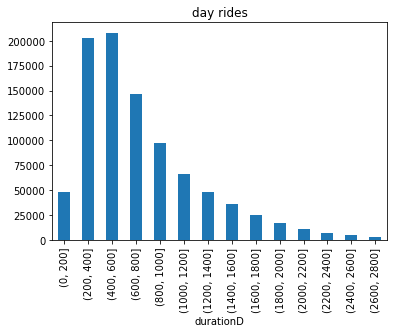

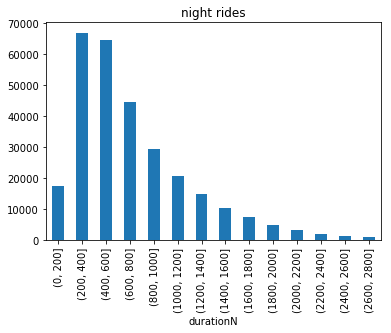

In [63]:
bins = np.arange(0,3000,200)
axD = df.durationD.groupby(pd.cut(df.durationD, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day rides")
axN = df.durationN.groupby(pd.cut(df.durationN, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night rides");

**Figure 1: histogrammed distribution of trip duration of daytime and nightime **

what i am looking at is the histogrammed distribution of trip duration of daytime and nightime.

why i am looking at it is to know if this distribution fit certain model.

what i should notice is this distribution is like the normal distribution.


              count_nonzero
durationD                  
(0, 200]           0.008104
(200, 400]         0.020032
(400, 600]         0.018516
(600, 800]         0.014355
(800, 1000]        0.010847
(1000, 1200]       0.010146
(1200, 1400]       0.008921
(1400, 1600]       0.005898
(1600, 1800]       0.004135
(1800, 2000]       0.002957
(2000, 2200]       0.002002
(2200, 2400]       0.001018
(2400, 2600]       0.000259
(2600, 2800]       0.000000


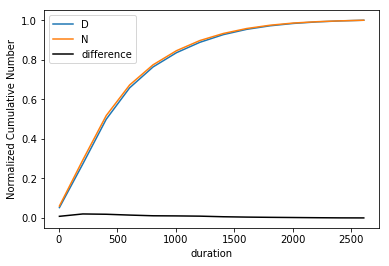

In [64]:
csD=df.durationD.groupby(pd.cut(df.durationD, bins)).agg([count_nonzero]).cumsum()

csN=df.durationN.groupby(pd.cut(df.durationN, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

**Figure 2: the cumulative distribution of trip durations of daytime and nightime.**


# KS tests to compare 2 samples

In [66]:
ks = scipy.stats.ks_2samp(df.durationD, df.durationN)
print(ks)

Ks_2sampResult(statistic=0.022865443568224782, pvalue=3.2721669791121084e-101)


## ks statistic=0.022865443568224782 means that the max difference of Cumsum curve Daytime and Cumsum curve Nightime.
## pvalue=3.2721669791121084e-101 is less than 0.05, so we can reject the $H_0$.



## Now redo the KS test with reducted dataset (a subset 200 times smaller)

In [81]:
df_sub = df.sample(n=int(len(df)/200),random_state=500)
len(df_sub)

6133

In [85]:
df_sub['durationD'].dropna(inplace= True)
df_sub['durationN'].dropna(inplace= True)
df_sub

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,startime,durationD,durationN
769399,1145,6/25/2015 14:38,6/25/2015 14:57,40.759711,-73.974023,Subscriber,1986.0,2015-06-25 14:38:00,1145.0,NaN
39894,1689,6/3/2015 12:46,6/3/2015 13:14,40.749013,-73.988484,Customer,NaN,2015-06-03 12:46:00,1689.0,NaN
220793,1477,6/9/2015 8:22,6/9/2015 8:47,40.728419,-73.987140,Subscriber,1984.0,2015-06-09 08:22:00,1477.0,NaN
757409,406,6/25/2015 8:41,6/25/2015 8:48,40.743954,-73.991449,Subscriber,1978.0,2015-06-25 08:41:00,406.0,NaN
309809,1628,6/11/2015 15:17,6/11/2015 15:44,40.739445,-73.976806,Subscriber,1970.0,2015-06-11 15:17:00,1628.0,NaN
277905,2628,6/10/2015 17:42,6/10/2015 18:26,40.722438,-74.005664,Subscriber,1984.0,2015-06-10 17:42:00,2628.0,NaN
583562,511,6/19/2015 18:58,6/19/2015 19:06,40.718939,-73.992663,Subscriber,1982.0,2015-06-19 18:58:00,511.0,NaN
321519,224,6/11/2015 19:09,6/11/2015 19:12,40.739713,-73.994564,Subscriber,1969.0,2015-06-11 19:09:00,NaN,224.0
965848,480,1/4/2015 14:35,1/4/2015 14:43,40.756800,-73.982912,Subscriber,1975.0,2015-01-04 14:35:00,480.0,NaN
915056,397,6/30/2015 10:59,6/30/2015 11:05,40.730287,-73.990765,Subscriber,1972.0,2015-06-30 10:59:00,397.0,NaN


In [86]:
ks_sub = scipy.stats.ks_2samp(df_sub.durationD, df_sub.durationN)
print (ks_sub)

Ks_2sampResult(statistic=0.05797779555274556, pvalue=0.0012699260027727291)


##  conclusion:

KS statistic = 0.5276

p-value = 0.0

We can reject the null hypothesis since the p-value is below 0.05.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [77]:
day = np.random.choice(df.durationD, len(df.durationN), replace = True)

In [78]:
from scipy.stats.stats import pearsonr

ps = scipy.stats.pearsonr(day, df.durationN)
ps



(0.000922637711286155, 0.61886068062981581)

### There are no strong correlation between daytime rider duration and nighttime rider duration as the Pearson correlation coefficient = 0.00059 shows.
### The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. 

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [74]:
durationD=df.durationD
durationN=df.durationN

In [75]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis


np.random.seed(123)

a = np.random.choice(durationD, size=len(durationN),replace=False) 
np.asarray(durationN)

array([ 1338.,   290.,   634., ...,   798.,   725.,   892.])

In [76]:
# Use the Spearman's to calculate the corrlation between the dataset

sm = scipy.stats.spearmanr(a, durationN)
print(sm)

SpearmanrResult(correlation=0.0011409352435879166, pvalue=0.53844447619516778)


# Conclusion:

#### The correlation value of -0.0014 is extremely close to zero. So this suggests weak relations by Spearman's coefficient. The p-value is not very meaningful here. Since the there is almost no relation between the two.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

# Test 2: age of bikers for trips originating in Manhattan and in Brooklyn

### SPLIT BY CATEGORY

as an example I am splitting data by location and looking at age:

H0: there is no statistical difference in the user's age distribution from Manhatan and from Brooklyn.

H1:there is significant statistical difference in the user's age distribution from Manhattan and from Brooklyn.

α=0.05

In [91]:
df2 = pd.concat([df1,df2],ignore_index=True)

In [89]:
MN = pd.read_csv(os.getenv("PUIDATA") + "/"  + 'MN.csv')


In [92]:

BK = pd.read_csv(os.getenv("PUIDATA") + "/"  +'BK.csv')

In [93]:
df2['Borough'] = ''

In [94]:
df2.loc[df2.iloc[BK.OID,:].index,'Borough'] = 'BK'

In [95]:
df2.loc[df2.iloc[MN.OID,:].index,'Borough'] = 'MN'

In [96]:

df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Borough
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,


In [97]:

df2['ageMN'] = df2['age'][df2['Borough'] == 'MN']
df2['ageBK'] = df2['age'][df2['Borough'] == 'BK']

KeyError: 'age'

In [98]:

df2 = df2.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'age',u'Borough'],axis=1)

ValueError: labels [u'date' u'age'] not contained in axis

In [99]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Borough
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,


In [100]:
df2.dropna(how='all',inplace= True)

# 2.1 K-S Test¶

In [101]:
ks = scipy.stats.ks_2samp(df2.ageMN, df2.ageBK)
print (ks)

AttributeError: 'DataFrame' object has no attribute 'ageMN'